# Classifying wild animals

https://www.kaggle.com/datasets/anshulmehtakaggl/wildlife-animals-images



Say hi at https://www.facebook.com/datascienceteacherbrandyn and let me know if you have any questions

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

# Import to df

In [ ]:
import numpy as np
import cv2 
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path

# Flow from Directory

## File Directories

### image_size

In [ ]:
image_size = (224, 224)

In [ ]:
dataset_dir = os.path.join('/content/gdrive', 'MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator')

dataset_train_dir = os.path.join(dataset_dir, 'WildAnimals/train')
dataset_train_cheetah_len = len(os.listdir(os.path.join(dataset_train_dir, 'cheetah')))
dataset_train_fox_len = len(os.listdir(os.path.join(dataset_train_dir, 'fox')))
# dataset_train_hyena_len = len(os.listdir(os.path.join(dataset_train_dir, 'hyena')))
dataset_train_lion_len = len(os.listdir(os.path.join(dataset_train_dir, 'lion')))
dataset_train_tiger_len = len(os.listdir(os.path.join(dataset_train_dir, 'tiger')))
dataset_train_wolf_len = len(os.listdir(os.path.join(dataset_train_dir, 'wolf')))

dataset_validation_dir = os.path.join(dataset_dir, 'WildAnimals/validation')
dataset_validation_cheetah_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cheetah')))
dataset_validation_fox_len = len(os.listdir(os.path.join(dataset_validation_dir, 'fox')))
# dataset_validation_hyena_len = len(os.listdir(os.path.join(dataset_validation_dir, 'hyena')))
dataset_validation_lion_len = len(os.listdir(os.path.join(dataset_validation_dir, 'lion')))
dataset_validation_tiger_len = len(os.listdir(os.path.join(dataset_validation_dir, 'tiger')))
dataset_validation_wolf_len = len(os.listdir(os.path.join(dataset_validation_dir, 'wolf')))


print('Train cheetah: %s' % dataset_train_cheetah_len)
print('Train fox: %s' % dataset_train_fox_len)
# print('Train hyena: %s' % dataset_train_hyena_len)
print('Train lion: %s' % dataset_train_lion_len)
print('Train tiger: %s' % dataset_train_tiger_len)
print('Train wolf: %s' % dataset_train_wolf_len)
print('validation cheetah: %s' % dataset_validation_cheetah_len)
print('validation fox: %s' % dataset_validation_fox_len)
# print('validation hyena: %s' % dataset_validation_hyena_len)
print('validation lion: %s' % dataset_validation_lion_len)
print('validation tiger: %s' % dataset_validation_tiger_len)
print('validation wolf: %s' % dataset_validation_wolf_len)

Train cheetah: 315
Train fox: 227
Train lion: 278
Train tiger: 253
Train wolf: 242
validation cheetah: 27
validation fox: 23
validation lion: 16
validation tiger: 16
validation wolf: 21


In [ ]:
dataset_validation_dir

'/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/validation'

## Image dataGenerator

In [ ]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(  rescale=1./255,
                                                            rotation_range=6,  # rotation
                                                            width_shift_range=0.25,  # horizontal shift
                                                            height_shift_range=0.25, # vertical shift
                                                            zoom_range=0.15,  # zoom
                                                            horizontal_flip=True,  # horizontal flip
                                                            # brightness_range=[0.2,0.8],
                                                            validation_split=.05
                                                          )


In [ ]:
generator_train = datagen_train.flow_from_directory(
                                                      dataset_train_dir,
                                                      target_size = image_size,
                                                      batch_size = 170,
                                                      shuffle = True,
                                                      color_mode='rgb'
                                                  )

Found 1315 images belonging to 5 classes.


In [ ]:
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
generator_val = datagen_val.flow_from_directory(
                                                  dataset_validation_dir,
                                                  target_size = image_size,
                                                  batch_size = 60,
                                                  shuffle = True,
                                                  color_mode='rgb'
                                              )

Found 103 images belonging to 5 classes.


## Inspect Images

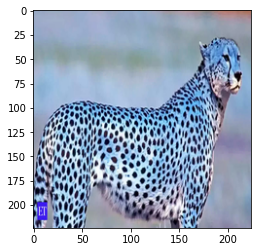

In [ ]:
PATH = '/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/train/cheetah/00000002_224resized.png'
img = cv2.imread(PATH)
plt.imshow(np.array(img))

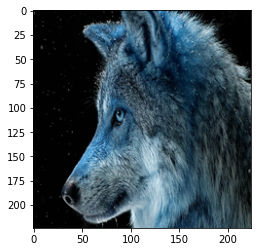

In [ ]:
PATH = '/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/train/wolf/00000002_224resized.png'
img = cv2.imread(PATH)
plt.imshow(np.array(img))

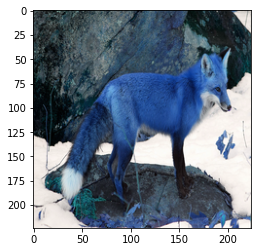

In [ ]:
PATH = '/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/train/fox/00000002_224resized.png'
img = cv2.imread(PATH)
plt.imshow(np.array(img))

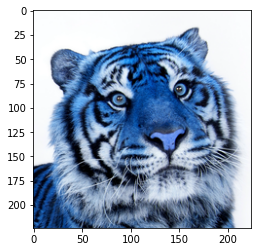

In [ ]:
PATH = '/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/train/tiger/00000002_224resized.png'
img = cv2.imread(PATH)
plt.imshow(np.array(img))

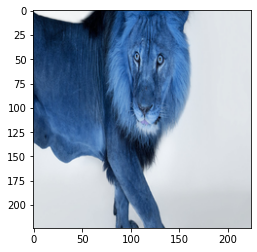

In [ ]:
PATH = '/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/08. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/train/lion/00000002_224resized.png'
img = cv2.imread(PATH)
plt.imshow(np.array(img))

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [ ]:
# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in generator_train.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [ ]:
dict_label = {0:'cheetah', 1:'fox', 2:'lion', 3:'tiger', 4:'wolf'}

# Preprocessing

# Modeling

## Architecture

In [ ]:
krnl_size = (8,8)
pl_size = (2,2)
dp_out = .03
act_cnn = 'elu'
act_body = 'elu'
act_head = 'softmax'
eps = 400
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, kernel_size=krnl_size, input_shape=(224, 224, 3), activation=act_cnn ),
                                    tf.keras.layers.Conv2D(64, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.MaxPooling2D(pool_size=pl_size),
                                    tf.keras.layers.Conv2D(128, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.Conv2D(128, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(256, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.Conv2D(256, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.Dropout(dp_out),
                                    tf.keras.layers.Conv2D(512, kernel_size=krnl_size, activation=act_cnn ),
                                    tf.keras.layers.Dropout(dp_out),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(86, activation=act_body),
                                    tf.keras.layers.Reshape(target_shape=(86,1)),
                                    tf.keras.layers.SimpleRNN(128, activation=act_body ),
                                    tf.keras.layers.Dropout(dp_out),
                                    tf.keras.layers.Dense(54, activation=act_body),
                                    # tf.keras.layers.Dropout(dp_out),
                                    tf.keras.layers.Dense(98, activation=act_body),
                                    tf.keras.layers.Reshape(target_shape=(98,1)),
                                    tf.keras.layers.SimpleRNN(128, activation=act_body ),
                                    tf.keras.layers.Dropout(dp_out),
                                    tf.keras.layers.Dense(32, activation=act_body),
                                    tf.keras.layers.Dense(5, activation=act_head)

])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt, metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 64)      12352     
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 210, 64)      262208    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 105, 105, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 98, 98, 128)       524416    
                                                                 
 conv2d_3 (Conv2D)           (None, 91, 91, 128)       1048704   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                    

## Plot Model

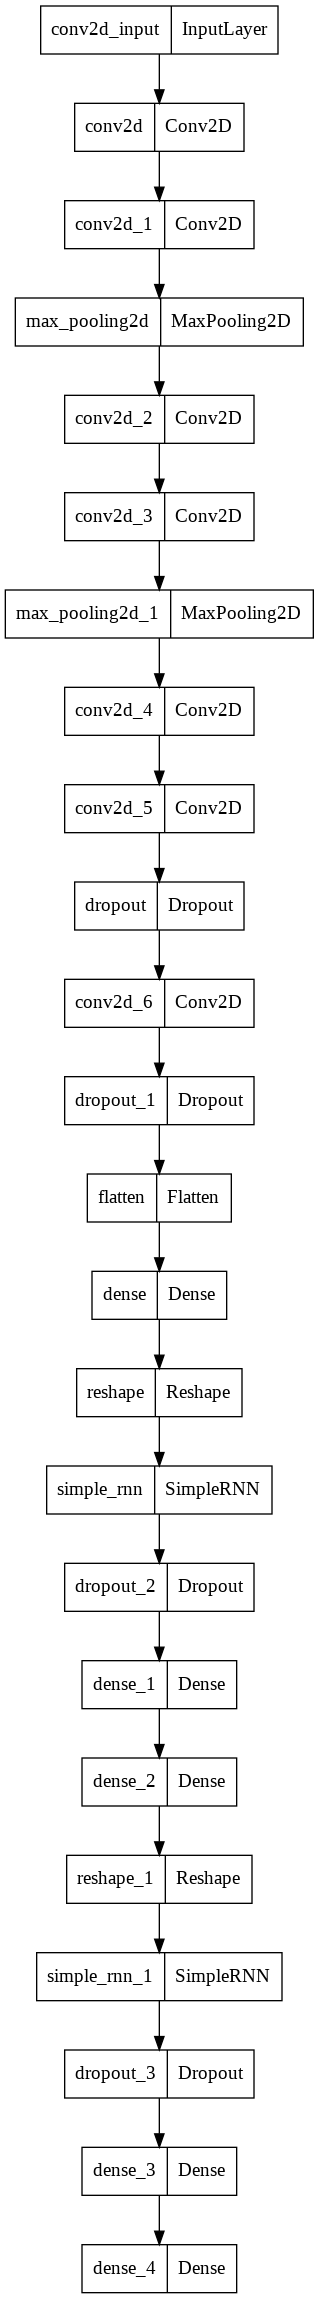

In [ ]:
tf.keras.utils.plot_model(model)

# Training

In [ ]:
history = model.fit(generator_train,
                    validation_data=generator_val,
                    epochs=eps)

Epoch 1/1600
4/8 [==============>...............] - ETA: 1:23 - loss: 1.7085 - acc: 0.1971

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


8/8 [==============================] - 265s 25s/step - loss: 1.6790 - acc: 0.1916 - val_loss: 1.6333 - val_acc: 0.1942
Epoch 2/1600
8/8 [==============================] - 25s 3s/step - loss: 1.6912 - acc: 0.2319 - val_loss: 1.6097 - val_acc: 0.2621
Epoch 3/1600
8/8 [==============================] - 25s 3s/step - loss: 1.6099 - acc: 0.2373 - val_loss: 1.6066 - val_acc: 0.2621
Epoch 4/1600
8/8 [==============================] - 25s 3s/step - loss: 1.6171 - acc: 0.2259 - val_loss: 1.6088 - val_acc: 0.2621
Epoch 5/1600
8/8 [==============================] - 25s 3s/step - loss: 1.6084 - acc: 0.2266 - val_loss: 2.8291 - val_acc: 0.1553
Epoch 6/1600
8/8 [==============================] - 25s 3s/step - loss: 1.7836 - acc: 0.2228 - val_loss: 1.6089 - val_acc: 0.2621
Epoch 7/1600
8/8 [==============================] - 25s 3s/step - loss: 1.6004 - acc: 0.2464 - val_loss: 1.6032 - val_acc: 0.2427
Epoch 8/1600
8/8 [==============================] - 26s 3s/step - loss: 1.6262 - acc: 0.2190 - val_lo

## Model Evaluate

In [ ]:
score = model.evaluate(generator_val)
score

2/2 [==============================] - 1s 213ms/step - loss: 0.4021 - acc: 0.9029


[0.4021071791648865, 0.9029126167297363]

## Model Save

In [ ]:
model.save(f'/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/07. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/model2krnl_size{krnl_size}pl_size{pl_size}act_body{act_body}act_cnn{act_cnn}eps{eps}acc{np.round(score[1],4)}')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/07. DeepLearning_Tensorflow_ComputerVision_datagenerator/WildAnimals/model2krnl_size(8, 8)pl_size(2, 2)act_bodyeluact_cnnelueps1600acc0.9029/assets


# Summary

## Model History

Text(0.5, 1.0, 'Accuray over Epochs')

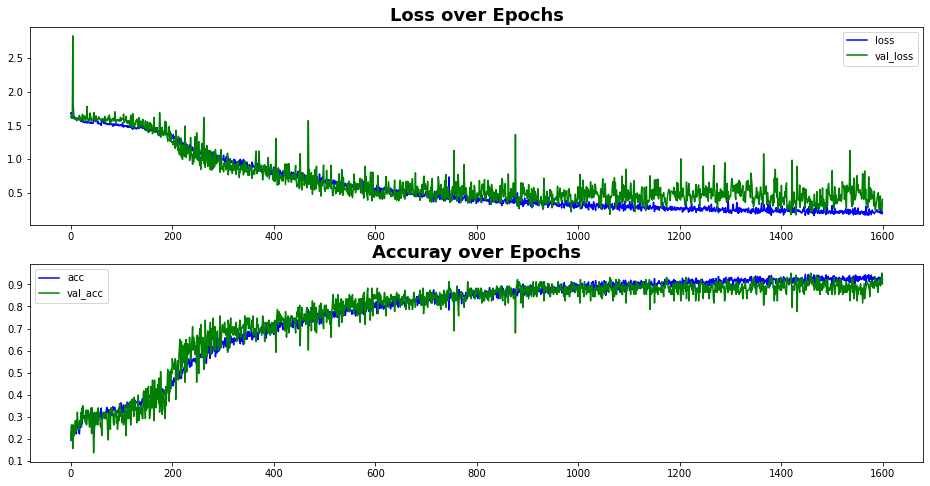

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,8))
sns.lineplot(data=history.history['loss'], color='blue', ax=ax[0])
sns.lineplot(data=history.history['val_loss'], color='green', ax=ax[0])
ax[0].legend(['loss', 'val_loss'])
ax[0].set_title('Loss over Epochs', fontweight='bold', fontsize=18)
sns.lineplot(data=history.history['acc'], color='blue', ax=ax[1])
sns.lineplot(data=history.history['val_acc'], color='green', ax=ax[1])
ax[1].legend(['acc', 'val_acc'])
ax[1].set_title('Accuray over Epochs', fontweight='bold', fontsize=18)

## Load model

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Data Project/Data Project/04. Teaching/000. Teaching Lessons/03. Lesson Plans/05. DeepLearning with Tensorflow/09. DeepLearning_Tensorflow_ComputerVision_Architecture/model2krnl_size(8, 8)pl_size(2, 2)act_bodyeluact_cnnelueps1600acc0.9029')

## Get labels

In [ ]:
# labels_pred = model.predict(generator_val)

In [ ]:
test_batch = generator_val


test_labels = []
test_inputs = []
test_preds = []
for i in range(0,2):
  # print(test_batch[0][0][0])
  test_labels.extend(np.array(test_batch[i][1]))
  test_preds.extend(model.predict(np.array(test_batch[i][0])))

## Confusion Matrix

In [ ]:
def confusion_matrix_plot(y, y_pred, dataset='Test'):
  cm = tf.math.confusion_matrix( y, y_pred).numpy()
  df_cm = pd.DataFrame(cm, index = [dict_label[i] for i in [0,1,2,3,4]],
                columns = [f'{dict_label[i]}_predict' for i in [0,1,2,3,4]])
  group_counts = ["{0:0.0f}".format(value) for value in
              cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(5,5)
  plt.figure(figsize = (10,6))
  sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
  plt.ylabel('\nTrue label\n', fontsize=14, fontweight='bold')
  plt.xlabel('\nPredicted label\n', fontsize=14, fontweight='bold')
  plt.title(f'\n{dataset} Confusion Matrix\n', fontsize=20, fontweight='bold')

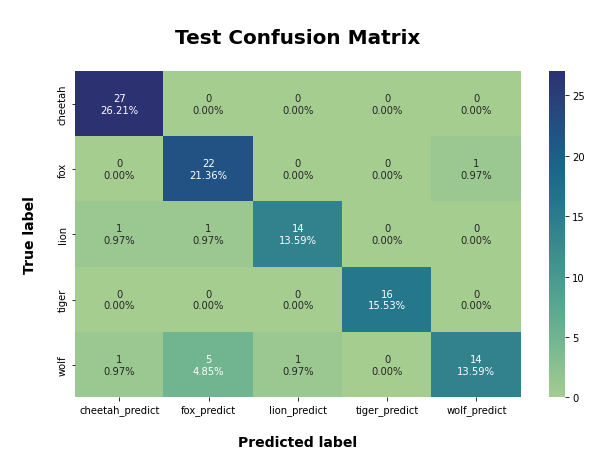

In [ ]:
confusion_matrix_plot(np.argmax(test_labels[:103], axis=1), np.argmax(test_preds, axis=1))